# Developing "Momentum" Trading Strategy
* Many differnt takes on this strategy
* Sometimes referred to as trend following
* Whatever you do and call it, you first need to research potential trading signals

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt

### 1. Download data: 
* Many services for this, some paid some free 
* Yahoo Finance API
* Typically trading "systems" involve a number of securities
* For this demonstration we are just going to look at GLD --> the gold ETF

In [2]:
gld = pdr.get_data_yahoo('GLD')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
Date,,,,,
2017-01-04,1,111.059998,111.220001,110.610001,110.860001
2017-01-05,2,112.160004,112.940002,112.070000,112.580002
2017-01-06,3,111.809998,112.379997,111.570000,111.750000
2017-01-09,4,112.389999,113.040001,112.180000,112.669998
2017-01-10,5,112.940002,113.449997,112.639999,113.150002


In [3]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-04 to 2022-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### 2. Add data/transform data
* calculate signal based on some price or statistical action
* we are going to try a moving average crossover to generate signals
* for this strategy we will always by "in" a trade, either long or short
* we are modeling; this means real life variation should be expected

#### Add moving averages to the data frame

In [4]:
# Need to shift over one day because if we don't we are trading
# as if we already know the closing price of the day we are in 
# in order to calculate the respective 9-day and 21-day moving averages.
# Thus the first 9-day and 21-day moving averages must be on the 22nd day row 
# to allow for the calculation of the 21 day moving average from 
# the first 21 days of closing prices before it. We could also run 
# this project based on open prices instead of closing prices, but results 
# will be very similar.


In [5]:
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2017-02-01,20,114.660004,115.449997,114.139999,115.199997,114.607778,NaN
2017-02-02,21,116.260002,116.570000,115.629997,115.839996,114.655556,NaN
2017-02-03,22,115.730003,116.370003,115.709999,116.129997,114.743333,114.088571
2017-02-06,23,117.070000,117.739998,116.739998,117.699997,114.781110,114.339524
2017-02-07,24,117.309998,117.739998,117.199997,117.459999,115.051110,114.583333
2017-02-08,25,118.089996,118.589996,117.809998,118.190002,115.399999,114.855238


#### Add "signal" column  

In [6]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2017-02-03,22,115.730003,116.370003,115.709999,116.129997,114.743333,114.088571,1
2017-02-06,23,117.070000,117.739998,116.739998,117.699997,114.781110,114.339524,1
2017-02-07,24,117.309998,117.739998,117.199997,117.459999,115.051110,114.583333,1
2017-02-08,25,118.089996,118.589996,117.809998,118.190002,115.399999,114.855238,1
2017-02-09,26,118.190002,118.580002,117.199997,117.290001,115.947777,115.118095,1


#### Calculate Instantaneous returns/system returns

In [7]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-02-03,22,115.730003,116.370003,115.709999,116.129997,114.743333,114.088571,1,NaN,NaN,NaN
2017-02-06,23,117.070000,117.739998,116.739998,117.699997,114.781110,114.339524,1,0.013429,0.013429,0.0
2017-02-07,24,117.309998,117.739998,117.199997,117.459999,115.051110,114.583333,1,-0.002041,-0.002041,0.0
2017-02-08,25,118.089996,118.589996,117.809998,118.190002,115.399999,114.855238,1,0.006196,0.006196,0.0
2017-02-09,26,118.190002,118.580002,117.199997,117.290001,115.947777,115.118095,1,-0.007644,-0.007644,0.0


#### Plot trades on time series

In [8]:
# This plots about one year (last 252 days) of the data from around
# May 2020 to April 2021

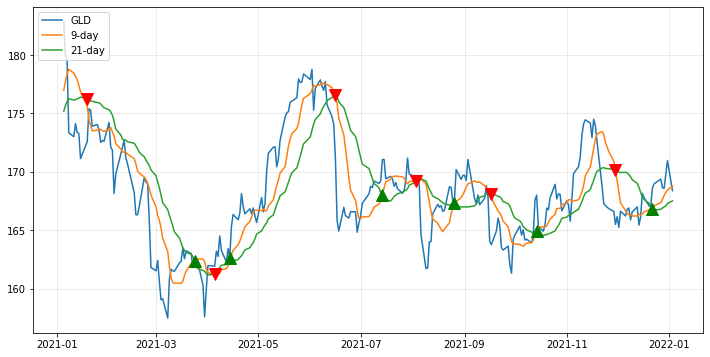

In [9]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [10]:
# Now we will analyze whether this momentum strategy
# of shorting then going long does better or worse than
# just holding long the entire time.

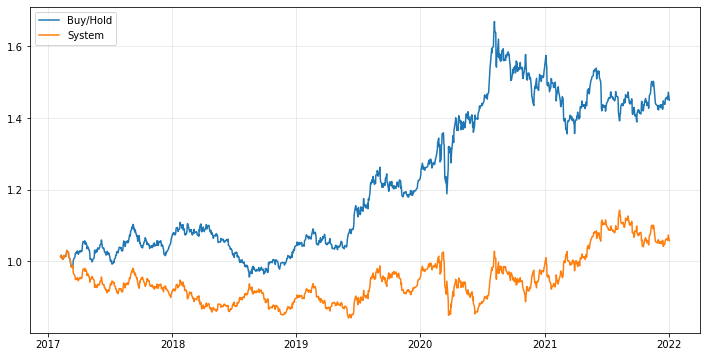

In [11]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [12]:
# Return of the buy and hold strategy over the 5 years
np.exp(gld['return']).cumprod()[-1] -1

0.44996984835354414

In [13]:
# return of the momentum strategy over the past 5 years
np.exp(gld['system_return']).cumprod()[-1] -1

0.05759801926213726